In [157]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate
from statistics import mean

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

### 1.1.1) Retornando array flatten

In [158]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

### 1.1.2) Padronizar as características (normalização)

In [159]:
def config_standart_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

## 1.2) Carregar os dados de treinamento e teste

In [160]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)
    # y_train, y_test = config_standart_scaler(X_train, X_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [161]:
def train_decision_tree(X_train, y_train):
    tree_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1) 

    # Utilizando cross_val_score para obter as pontuações de cada fold
    cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')
    f1_per_fold = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='f1_weighted')
    recall_per_fold = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='recall_weighted')
    precision_per_fold = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='precision_weighted')

    tree_model.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy_mean = mean(cv_scores)
    f1_mean = mean(f1_per_fold)
    recall_mean = mean(recall_per_fold)
    precision_mean = mean(precision_per_fold)

    return accuracy_mean, f1_mean, recall_mean, precision_mean, tree_model

## 1.4) Carregando dados e treinando (Cross validation)

In [162]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_decision_tree(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.9857142857142858
F1: 0.9857019075523756
Revocação: 0.9857142857142858
Precisão: 0.9859863061466836

Conjunto 2


Acurácia: 0.9885714285714285
F1: 0.9885784522420324
Revocação: 0.9885714285714285
Precisão: 0.9887984792125538

Conjunto 3
Acurácia: 0.9928571428571429
F1: 0.9928648914580899
Revocação: 0.9928571428571429
Precisão: 0.9931043956043956

Conjunto 4
Acurácia: 0.9914285714285714
F1: 0.9914293252679965
Revocação: 0.9914285714285714
Precisão: 0.9916601090886805

Conjunto 5
Acurácia: 0.9885714285714285
F1: 0.9886055442931259
Revocação: 0.9885714285714285
Precisão: 0.9889601407364565

Conjunto 6
Acurácia: 0.9842857142857143
F1: 0.9842922099533458
Revocação: 0.9842857142857143
Precisão: 0.9846453355746021

Conjunto 7
Acurácia: 0.9785714285714285
F1: 0.9785452083316509
Revocação: 0.9785714285714285
Precisão: 0.9791022032460548

Conjunto 8
Acurácia: 0.9914285714285714
F1: 0.9914156747970905
Revocação: 0.9914285714285714
Precisão: 0.9916719093434475

Conjunto 9
Acurácia: 0.9871428571428571
F1: 0.9871294388548881
Revocação: 0.9871428571428571
Precisão: 0.9872318343244566

Conjunto 10
Acurácia: 0.991

In [163]:
# Criar um DataFrame com os resultados
resultados_acuracia_percent = [f"{acuracia * 100:.2f}%" for acuracia in resultados_acuracia]
resultados_precisao_percent = [f"{precisao * 100:.2f}%" for precisao in resultados_precisao]
resultados_revocacao_percent = [f"{revocacao * 100:.2f}%" for revocacao in resultados_revocacao]
resultados_f1_percent = [f"{f1 * 100:.2f}%" for f1 in resultados_f1]

# Criar um DataFrame com os resultados
data = {
    'Conjunto': [f'Conjunto {i+1}' for i in range(conjuntos)],
    'Acurácia': resultados_acuracia_percent,
    'Precisão': resultados_precisao_percent,
    'Revocação': resultados_revocacao_percent,
    'F1': resultados_f1_percent
}

df_resultados = pd.DataFrame(data)

print("# Resultados Médios do treinamento em 10 Conjuntos de Dados\n")
print(df_resultados.to_markdown(index=False))

# Resultados Médios do treinamento em 10 Conjuntos de Dados

| Conjunto    | Acurácia   | Precisão   | Revocação   | F1     |
|:------------|:-----------|:-----------|:------------|:-------|
| Conjunto 1  | 98.57%     | 98.60%     | 98.57%      | 98.57% |
| Conjunto 2  | 98.86%     | 98.88%     | 98.86%      | 98.86% |
| Conjunto 3  | 99.29%     | 99.31%     | 99.29%      | 99.29% |
| Conjunto 4  | 99.14%     | 99.17%     | 99.14%      | 99.14% |
| Conjunto 5  | 98.86%     | 98.90%     | 98.86%      | 98.86% |
| Conjunto 6  | 98.43%     | 98.46%     | 98.43%      | 98.43% |
| Conjunto 7  | 97.86%     | 97.91%     | 97.86%      | 97.85% |
| Conjunto 8  | 99.14%     | 99.17%     | 99.14%      | 99.14% |
| Conjunto 9  | 98.71%     | 98.72%     | 98.71%      | 98.71% |
| Conjunto 10 | 99.14%     | 99.16%     | 99.14%      | 99.14% |


## 1.5) Analisando resultados gerais

In [164]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0     0.988  0.988277      0.988  0.987999


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


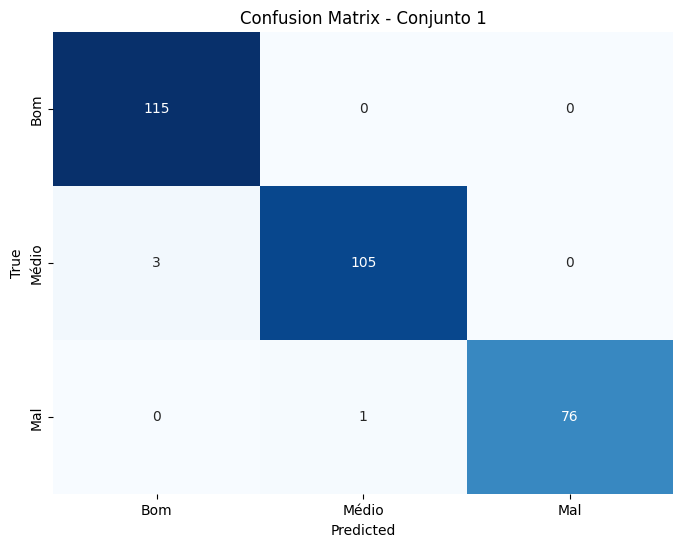

Acurácia no conjunto de teste: 98.67%

Precisão no conjunto de teste: 98.69%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      1.00      0.99       115
       Medio       0.99      0.97      0.98       108
        Ruim       1.00      0.99      0.99        77

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 2


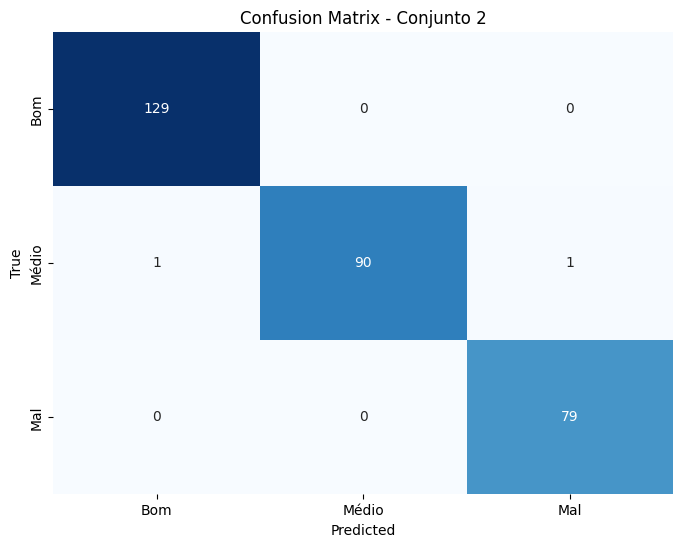

Acurácia no conjunto de teste: 99.33%

Precisão no conjunto de teste: 99.34%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      1.00      1.00       129
       Medio       1.00      0.98      0.99        92
        Ruim       0.99      1.00      0.99        79

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 3


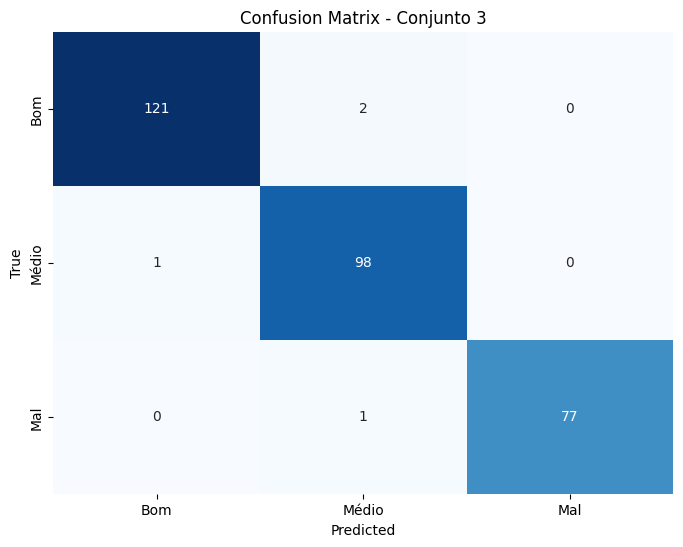

Acurácia no conjunto de teste: 98.67%

Precisão no conjunto de teste: 98.68%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      0.98      0.99       123
       Medio       0.97      0.99      0.98        99
        Ruim       1.00      0.99      0.99        78

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 4


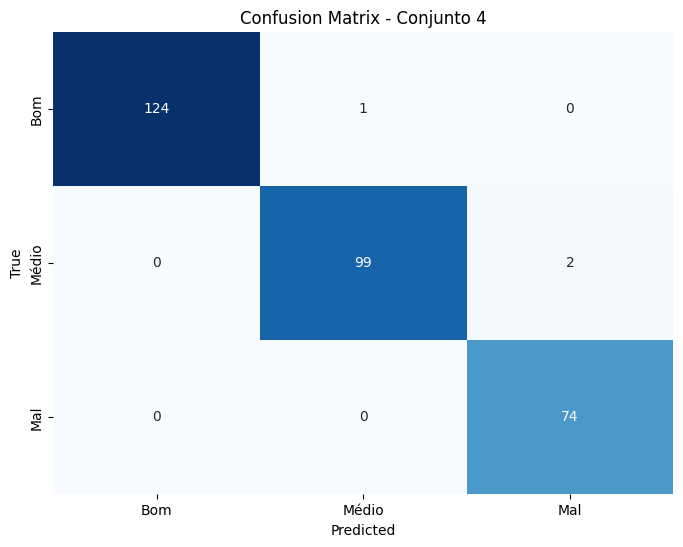

Acurácia no conjunto de teste: 99.00%

Precisão no conjunto de teste: 99.01%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      0.99      1.00       125
       Medio       0.99      0.98      0.99       101
        Ruim       0.97      1.00      0.99        74

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 5


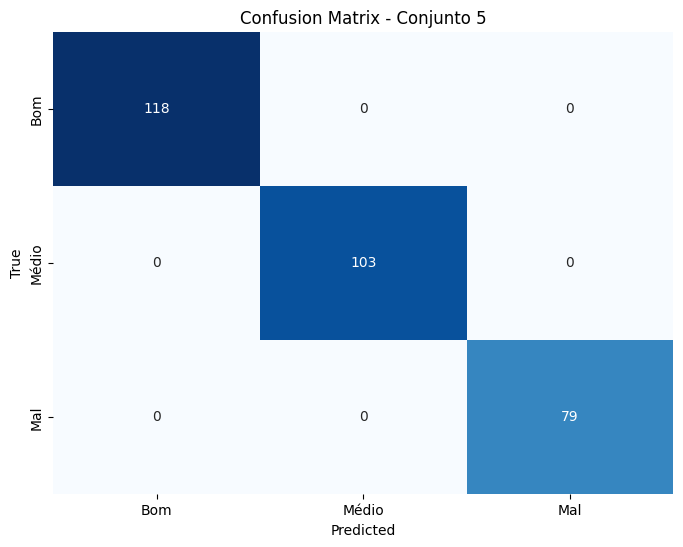

Acurácia no conjunto de teste: 100.00%

Precisão no conjunto de teste: 100.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      1.00      1.00       118
       Medio       1.00      1.00      1.00       103
        Ruim       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


----------------------------------------------------------------

Eficácia do conjunto 6


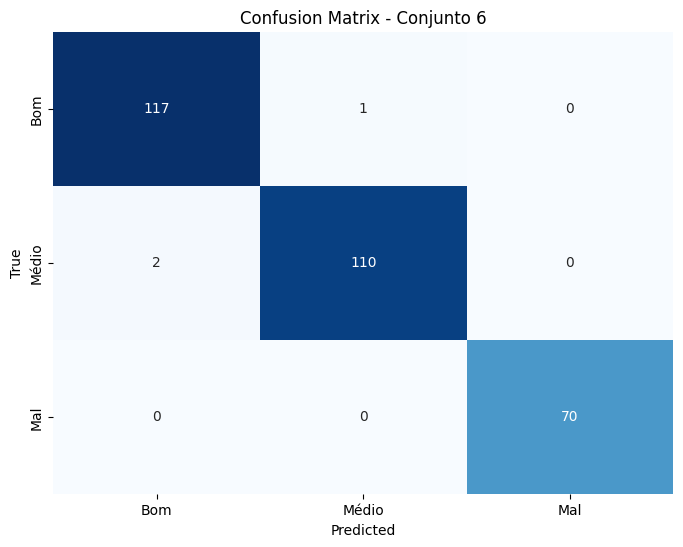

Acurácia no conjunto de teste: 99.00%

Precisão no conjunto de teste: 99.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.99      0.99       118
       Medio       0.99      0.98      0.99       112
        Ruim       1.00      1.00      1.00        70

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 7


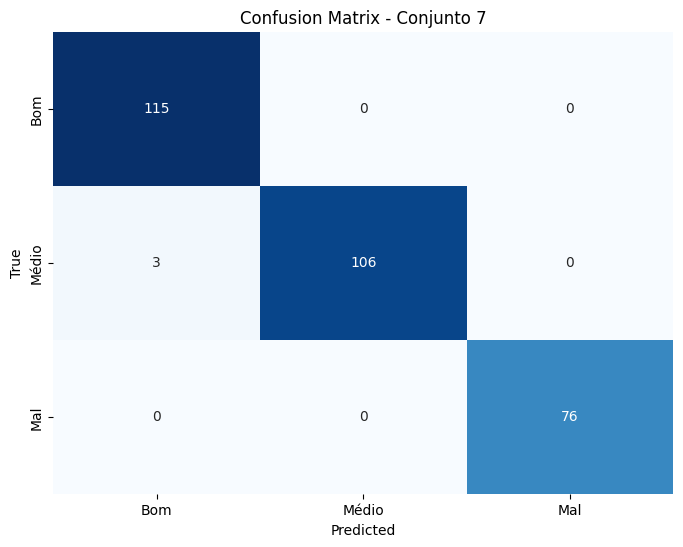

Acurácia no conjunto de teste: 99.00%

Precisão no conjunto de teste: 99.03%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      1.00      0.99       115
       Medio       1.00      0.97      0.99       109
        Ruim       1.00      1.00      1.00        76

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 8


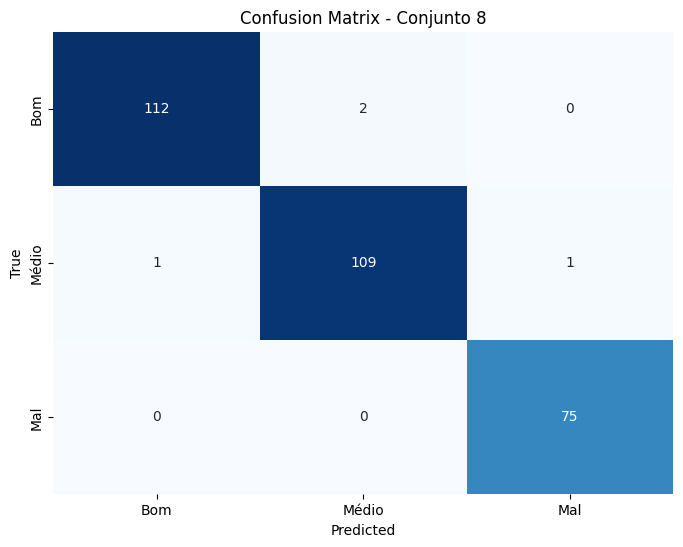

Acurácia no conjunto de teste: 98.67%

Precisão no conjunto de teste: 98.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      0.98      0.99       114
       Medio       0.98      0.98      0.98       111
        Ruim       0.99      1.00      0.99        75

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 9


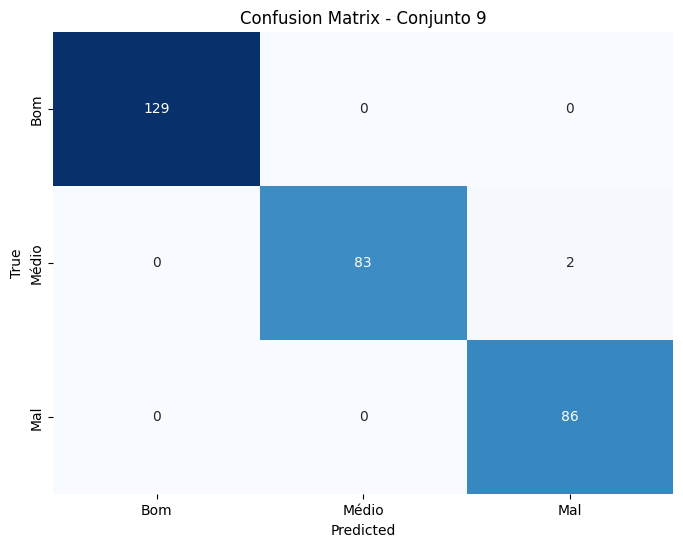

Acurácia no conjunto de teste: 99.33%

Precisão no conjunto de teste: 99.35%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      1.00      1.00       129
       Medio       1.00      0.98      0.99        85
        Ruim       0.98      1.00      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 10


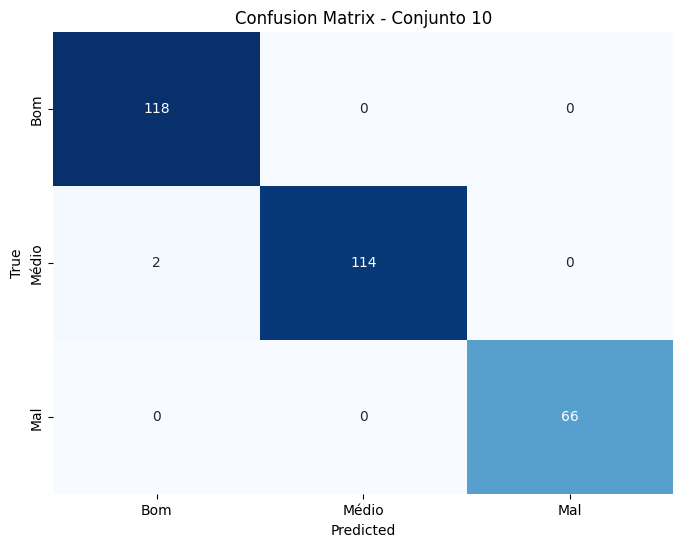

Acurácia no conjunto de teste: 99.33%

Precisão no conjunto de teste: 99.34%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      1.00      0.99       118
       Medio       1.00      0.98      0.99       116
        Ruim       1.00      1.00      1.00        66

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------



In [165]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
average_precisions = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

      # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')

    # Precisao do modelo
    precision = precision_score(y_test, y_pred, average='weighted')

    # Append precisions to the list
    average_precisions.append(precision)

    print(f'Precisão no conjunto de teste: {precision * 100:.2f}%\n')

    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [166]:
# Find the index of the conjunto with the highest average accuracy
accuracy_mean = mean(average_accuracies)
precision_mean = mean(average_precisions)

best_conjunto_index = np.argmax(average_accuracies)

# Acuracia media de todos os conjuntos
print(f'Acurácia média de todos os conjuntos: {accuracy_mean * 100:.2f}%')

# Precisao media de todos os conjuntos
print(f'Precisão média de todos os conjuntos: {precision_mean * 100:.2f}%')

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")


Acurácia média de todos os conjuntos: 99.10%
Precisão média de todos os conjuntos: 99.11%

O conjunto 5 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto novo


In [167]:
conjunto_novo = 0

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_novo} será utilizado para o teste de parâmetros")


O conjunto 0 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [168]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_novo]
y_train = y_train_array[conjunto_novo]
X_test = X_test_array[conjunto_novo]
y_test = y_test_array[conjunto_novo]


## 2.2) Treinando modelo 

In [169]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Teste diferentes critérios de divisão
    'splitter': ['best', 'random'],  # Teste diferentes estratégias para dividir nós
    'max_depth': [None, 10, 20, 30],  # Teste diferentes profundidades máximas da árvore
    'min_samples_split': [2, 4, 5, 10],  # Teste diferentes valores mínimos para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Teste diferentes valores mínimos para folhas
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring={'precision': make_scorer(precision_score, average='weighted')}, refit='precision', return_train_score=True)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

In [170]:
# Seus dados do GridSearchCV
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

# train_scores = results['mean_train_precision']
# test_scores = results['mean_test_precision']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]  # Adicione o índice de linha (i+1)
    table_data.append(row)

# Crie a tabela usando a função tabulate
table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                                                                                   │ Train Score   │ Validation Score   │
╞══════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}       │ 1             │ 0.985714           │
├──────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}     │ 1             │ 0

## 2.4) Analisando Cada combinação para var_smoothing

In [171]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

## 2.5) Predição para o melhor modelo

In [172]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.6) Matriz Confusão

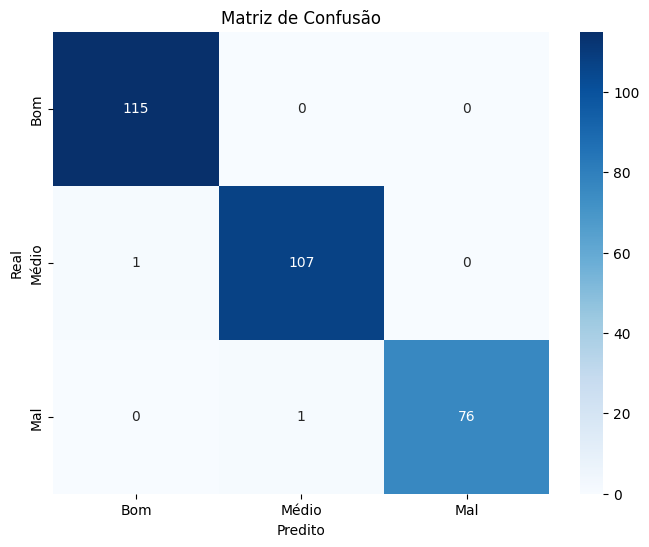

In [173]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.7) Métricas de eficácia

In [174]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      1.00      1.00       115
       Medio       0.99      0.99      0.99       108
        Ruim       1.00      0.99      0.99        77

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

----------------------------------------------------------------

Acurácia: 0.9933333333333333
Precisão: 0.9933620689655173
Recall: 0.9933333333333333
Medida F: 0.993329655094361
